# 4章　ニューラルネットワークの学習

In [ ]:
%matplotlib inline

import numpy as np
import matplotlib.pylab as plt

## 4-1 データから学習する

* 訓練データとテストデータを分ける
* 汎化能力が重要
* 特定のデータだけで学習させると過学習がおきる

## 4-2 損失関数

### 4-2-1 2乗和誤差

In [6]:
# one-hot表現
t = [ 0,  0,  1,  0,  0,  0,  0, 0, 0, 0 ]

In [7]:
def mean_squard_error(y, t):
    return 0.5 * np.sum((y - t) ** 2)

In [8]:
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
mean_squard_error(np.array(y), np.array(t))

0.097500000000000031

In [9]:
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
mean_squard_error(np.array(y), np.array(t))

0.59750000000000003

### 4.2.2 交差エントロピー誤差

In [55]:
def cross_entropy_error1(y, t):
    delta = 1e-7
    return -np.sum(t * np.log(y + delta))    

In [56]:
t = [ 0,  0,  1,  0,  0,  0,  0, 0, 0, 0 ]

In [57]:
cross_entropy_error1(np.array(y), np.array(t))

2.3025840929945458

In [58]:
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
cross_entropy_error1(np.array(y), np.array(t))

2.3025840929945458

### 4.2.3 ミニバッチ学習

In [45]:
import sys, os
import numpy as np
from dataset.mnist import load_mnist

In [46]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

In [48]:
print(x_train.shape)
print(t_train.shape)

(60000, 784)
(60000, 10)


In [53]:
# ランダムに値を選択する
train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

In [54]:
np.random.choice(60000, 10)

array([15037, 51503, 17673, 52752, 34094,  2921, 20603, 29035, 12316, 26444])

#### 4.2.4 [バッチ対応版] 交差エントロピー誤差の実装

In [69]:
def cross_entoropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    batch_size = y.shape(0)
    return -np.sum(t * np.log(y) / batch_size)

## 4.3 数値微分 

### 4.3.1 微分

In [82]:
# 悪い実装
def numerical_diff1(f, x):
    h - 10e-50
    return (f(x + h) - f(x) / h)

In [81]:
np.float32(1e-50)

0.0

In [103]:
#　微分
def numerical_diff(f, x):
    h - 1e-4
    return (f(x +h) - f(x - h)) / (2 * h)

In [98]:
# y = 0.01x^2 + 0.1x
def function1(x):
    return 0.01*x ** 2 + 0.1 * x

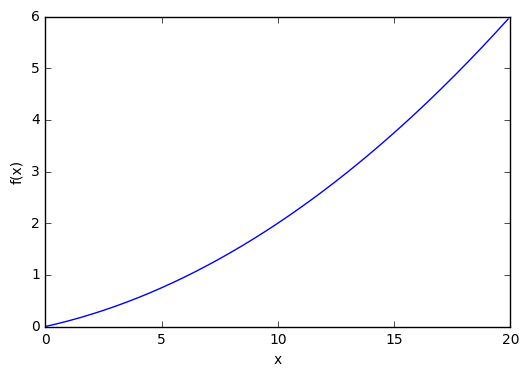

In [99]:
x = np.arange(0, 20, 0.1)
y = function1(x)

plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x, y)

In [104]:
numerical_diff(function1, 5)

0.1999999999990898

In [109]:
numerical_diff(function1, 10)

0.2999999999986347

In [110]:
def tangent_line(f, x):
    d = numerical_diff(f, x)
    print(d)
    y = f(x) - d*x
    return lambda t: d*t + y

0.1999999999990898


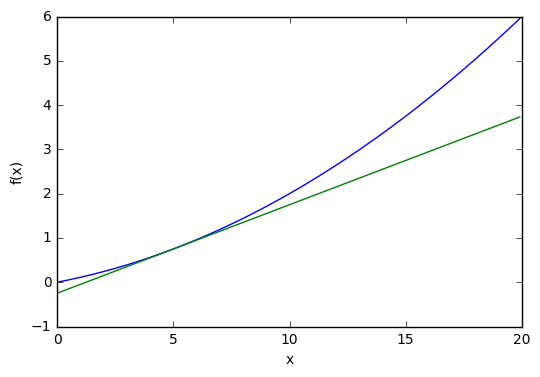

In [113]:
x = np.arange(0, 20, 0.1)
y = function1(x)

plt.xlabel("x")
plt.ylabel("f(x)")

tf = tangent_line(function1, 5)
y2 = tf(x)

plt.plot(x, y)
plt.plot(x, y2)
plt.show()

#### 4.3.3 偏微分

In [114]:
# f(x0, x1) = x0^2 + x1^2
def function2(x):
    return x[0]**2 + x[1]**2
    # return np.sum(x **2)

In [119]:
# x0 = 3, x1 = 4 x0に対する偏微分
def function_tmp1(x0):
    return x0**2 + 4**2

In [120]:
numerical_diff(function_tmp1, 3)

6.00000000000378

In [118]:
# x0 = 3, x1 = 4 x1に対する偏微分
def function_tmp2(x1):
    return 3**2 + x1**2

In [121]:
numerical_diff(function_tmp2, 4)

7.999999999999119

#### 勾配

In [133]:
def _numerical_gradient_no_batch(f, x):
    h = 1e-4
    grad = np.zeros_like(x)
    
    for idx in range(x.size):
        tmp_val = x[idx]
        x[idx] = tmp_val + h
        fxh1 = f(x)
        
        x[idx] = tmp_val - h
        fxh2 = f(x)
        
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val
        
    return grad

In [127]:
numerical_gradient(function2, np.array([3.0, 4.0]))

array([ 6.,  8.])

In [134]:
def numerical_gradient(f, X):
    if X.ndim == 1:
        return _numerical_gradient_no_batch(f, X)
    else:
        grad = np.zeros_like(X)
        
        for idx, x in enumerate(X):
            grad[idx] = _numerical_gradient_no_batch(f, x)
        
        return grad

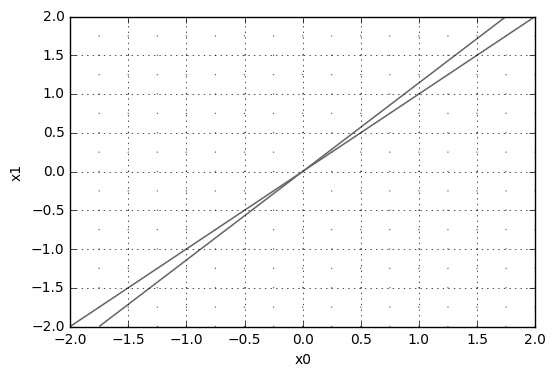

In [148]:
    x0 = np.arange(-2, 2.5, 0.25)
    x1 = np.arange(-2, 2.5, 0.25)
    X, Y = np.meshgrid(x0, x1)
    
    X = X.flatten()
    Y = Y.flatten()
    
    grad = numerical_gradient(function2, np.array([X, Y]) )
    
    
    ##　うまくグラフが書けていない・・・
    plt.figure()
    plt.quiver(X, Y, -grad[0], -grad[1],  angles="xy",color="#666666")#,headwidth=10,scale=40,color="#444444")
    plt.xlim([-2, 2])
    plt.ylim([-2, 2])
    plt.xlabel('x0')
    plt.ylabel('x1')
    plt.grid()
#    plt.legend()
    plt.draw()
    plt.show()

#### 4.4.1 勾配法

In [157]:
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    
    for i in range(step_num):
        grad = numerical_gradient(f, x)
        x -= lr * grad
        
    return x

In [150]:
# f(x0, x1) = x0^2 + x1^2
def function_2(x):
    return np.sum(x **2)

In [159]:
init_x = np.array([-3.0, 4.0])

gradient_descent(function_2, init_x=init_x, lr=0.1, step_num=100)

array([ -6.11110793e-10,   8.14814391e-10])

In [166]:
init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x=init_x, lr=10, step_num=100)

array([ -2.58983747e+13,  -1.29524862e+12])

In [167]:
init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x=init_x, lr=1e-10, step_num=100)

array([-2.99999994,  3.99999992])

In [ ]:
# simple-net以降は別ファイル